<font size="6"><b>Building Data Genome Project 2.0</b></font><br>
<font size="4"><b>Exploratory data analysis of metadata</b></font><br>
<br>
<font size="2">Biam! (pic.biam@gmail.com)</font>

In [1]:
# data and numbers
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
mpl.style.use('ggplot')

import gc

# Dataset

<p><b>Buildings metadata</b></p>
<ul>
<li><code>building_id</code>: building code-name with the structure <i>UniqueFirstName_SiteID_primaryspaceusage</i>.</li>
<li><code>site_id</code>: animal-code-name for the site.</li>
<li><code>primaryspaceusage</code>: Primary space usage of all buildings is mapped using the <a href="https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/identify-your-property-type" rel="nofollow">energystar scheme building description types</a>. </li>
<li><code>sqft</code>: building area in square feet (sq ft). </li>
<li><code>lat</code>: latitude in degrees.</li>
<li><code>lng</code>: longitude in degrees.</li>
 <li><code>electricity</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.</li>
<li><code>hotwater</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.</li>
<li><code>chilledwater</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.</li>
<li><code>steam</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.</li>
<li><code>water</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.</li>
<li><code>irrigation</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.</li>
<li><code>solar</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative.</li>
<li><code>gas</code>: presence of this kind of meter in the building. <code>Yes</code> if affirmative, <code>NaN</code> if negative./li>
<li><code>yearbuilt</code>: year built in the format YYYY.</li>
<li><code>numberoffloors</code>: number of floors.</li>
<li><code>date_opened</code>: date opened in the format D/M/YYYY.</li>
<li><code>sub_primaryspaceusage</code>: <a href="https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/identify-your-property-type" rel="nofollow">energystar scheme building description types</a> subcategory.</li>
<li><code>energystarscore</code>: <a href="https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/how-1-100">Energy Star Score.</a></li>
<li><code>eui</code>: <a href="https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/what-energy"> Energy use intensity.</a></li>
<li><code>heatingtype</code>: type of building's heating system.</li>
<li><code>industry</code>: building industry.</li>
<li><code>leed_level</code>: <a href"https://en.wikipedia.org/wiki/Leadership_in_Energy_and_Environmental_Design">Leadership in Energy and Environmental Design.</a></li>
<li><code>occupants</code>: number of ccupants?</li>
<li><code>rating</code>: building rating (system or criteria?)</li>
<li><code>site_eui</code>: site energy use intensity.</li>
<li><code>source_eui</code>: ?</li>
<li><code>sqm</code>: buildinga area in square meters?</li>
<li><code>subindustry</code>: building subindustry.</li>
<li><code>timezone</code>: time zone.</li>
</ul>

In [2]:
path = "..\\data\\metadata\\"

In [3]:
# Buildings data
metadata = pd.read_csv(path + "metadata.csv")
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 30 columns):
building_id              1636 non-null object
site_id                  1636 non-null object
primaryspaceusage        1615 non-null object
sqft                     1636 non-null float64
lat                      1636 non-null float64
lng                      1636 non-null float64
electricity              1578 non-null object
hotwater                 185 non-null object
chilledwater             555 non-null object
steam                    370 non-null object
water                    146 non-null object
irrigation               37 non-null object
solar                    5 non-null object
gas                      177 non-null object
yearbuilt                817 non-null float64
numberoffloors           441 non-null float64
sub_primaryspaceusage    1615 non-null object
date_opened              21 non-null object
energystarscore          163 non-null object
eui                      299 

# Exploratory Data Analysis

## Missing values

In [4]:
# Percentage of missing values in each feature
metadata.isna().sum()/len(metadata)*100

building_id               0.000000
site_id                   0.000000
primaryspaceusage         1.283619
sqft                      0.000000
lat                       0.000000
lng                       0.000000
electricity               3.545232
hotwater                 88.691932
chilledwater             66.075795
steam                    77.383863
water                    91.075795
irrigation               97.738386
solar                    99.694377
gas                      89.180929
yearbuilt                50.061125
numberoffloors           73.044010
sub_primaryspaceusage     1.283619
date_opened              98.716381
energystarscore          90.036675
eui                      81.723716
heatingtype              86.858191
industry                 64.608802
leed_level               91.687042
occupants                85.941320
rating                   88.753056
site_eui                 90.036675
source_eui               90.036675
sqm                      73.288509
subindustry         

In [ ]:
# Delete those which are mostly missing values?
# metadata = metadata.drop(["numberoffloors,"date_opened","energystarscore","eui","heatingtype","leed_level","occupants","rating","site_eui","source_eui"], axis=1)

## Sites location

In [6]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [7]:
# World map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Exclude Antartica
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
# Coordinate reference system used in this map
world.crs

{'init': 'epsg:4326'}

Latitude and longitude are of the site location (all buildings from the same location shares <code>lng</code> and <code>lat</code> values).

In [8]:
# All the sites
sites = metadata[["site_id","lat","lng"]].groupby("site_id").median()
# Converts lat and lng to geometry objects
geometry = [Point(xy) for xy in zip (sites["lng"], sites["lat"])]
# Creates geoDataFrame
geo_sites = gpd.GeoDataFrame(sites, crs = world.crs, geometry = geometry)
geo_sites

,lat,lng,geometry
site_id,,,
Bear,37.871903,-122.260729,POINT (-122.26073 37.87190)
Bobcat,41.197811,-111.948613,POINT (-111.94861 41.19781)
Bull,30.267200,-97.743100,POINT (-97.74310 30.26720)
Cockatoo,42.459837,-76.485292,POINT (-76.48529 42.45984)
Crow,45.387600,-75.696000,POINT (-75.69600 45.38760)
Eagle,40.350000,-74.700000,POINT (-74.70000 40.35000)
Fox,33.424425,-111.928140,POINT (-111.92814 33.42443)
Gator,28.531503,-81.374808,POINT (-81.37481 28.53150)
Hog,44.978782,-93.255398,POINT (-93.25540 44.97878)


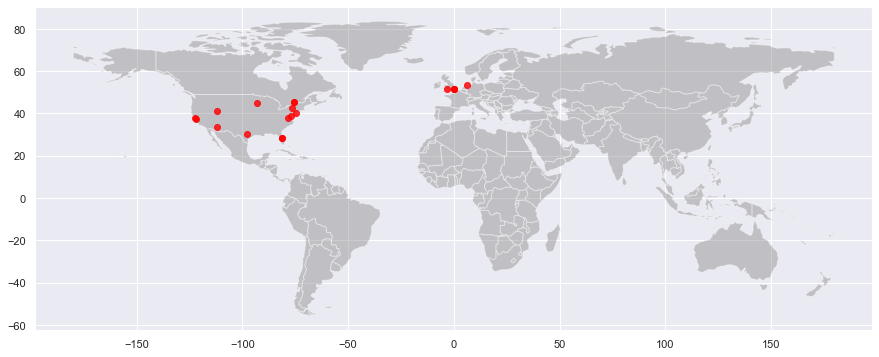

In [9]:
# Plot
sns.set(font_scale = 1)
fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax = ax, alpha = 0.4, color = "grey")
geo_sites.plot(ax = ax, alpha = 0.8, color = "red")

In [13]:
fig.savefig("..\\figures\\map.pdf", bbox_inches='tight')
fig.savefig("..\\figures\\map.png", dpi=72, bbox_inches='tight')

(20, 60)

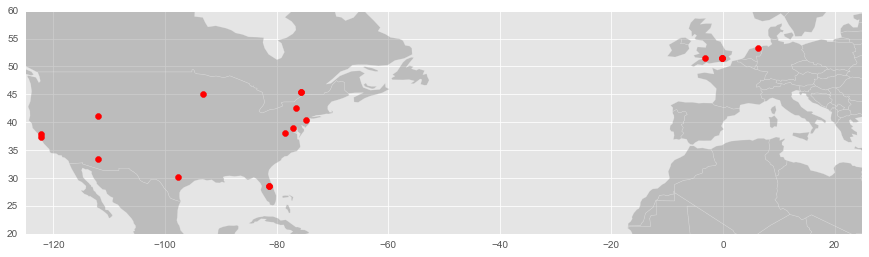

In [9]:
# Zoom Plot
fig, ax = plt.subplots(figsize = (15,15))
world.plot(ax = ax, alpha = 0.4, color = "grey")
geo_sites.plot(ax = ax, color = "red")
ax.set_xlim([-125, 25])
ax.set_ylim([20, 60])

## Categorical features

In [30]:
len(np.unique(metadata["building_id"]))

1636

In [14]:
colors =  ["rebeccapurple", "crimson", "orangered", "gold", "olivedrab", "royalblue"]

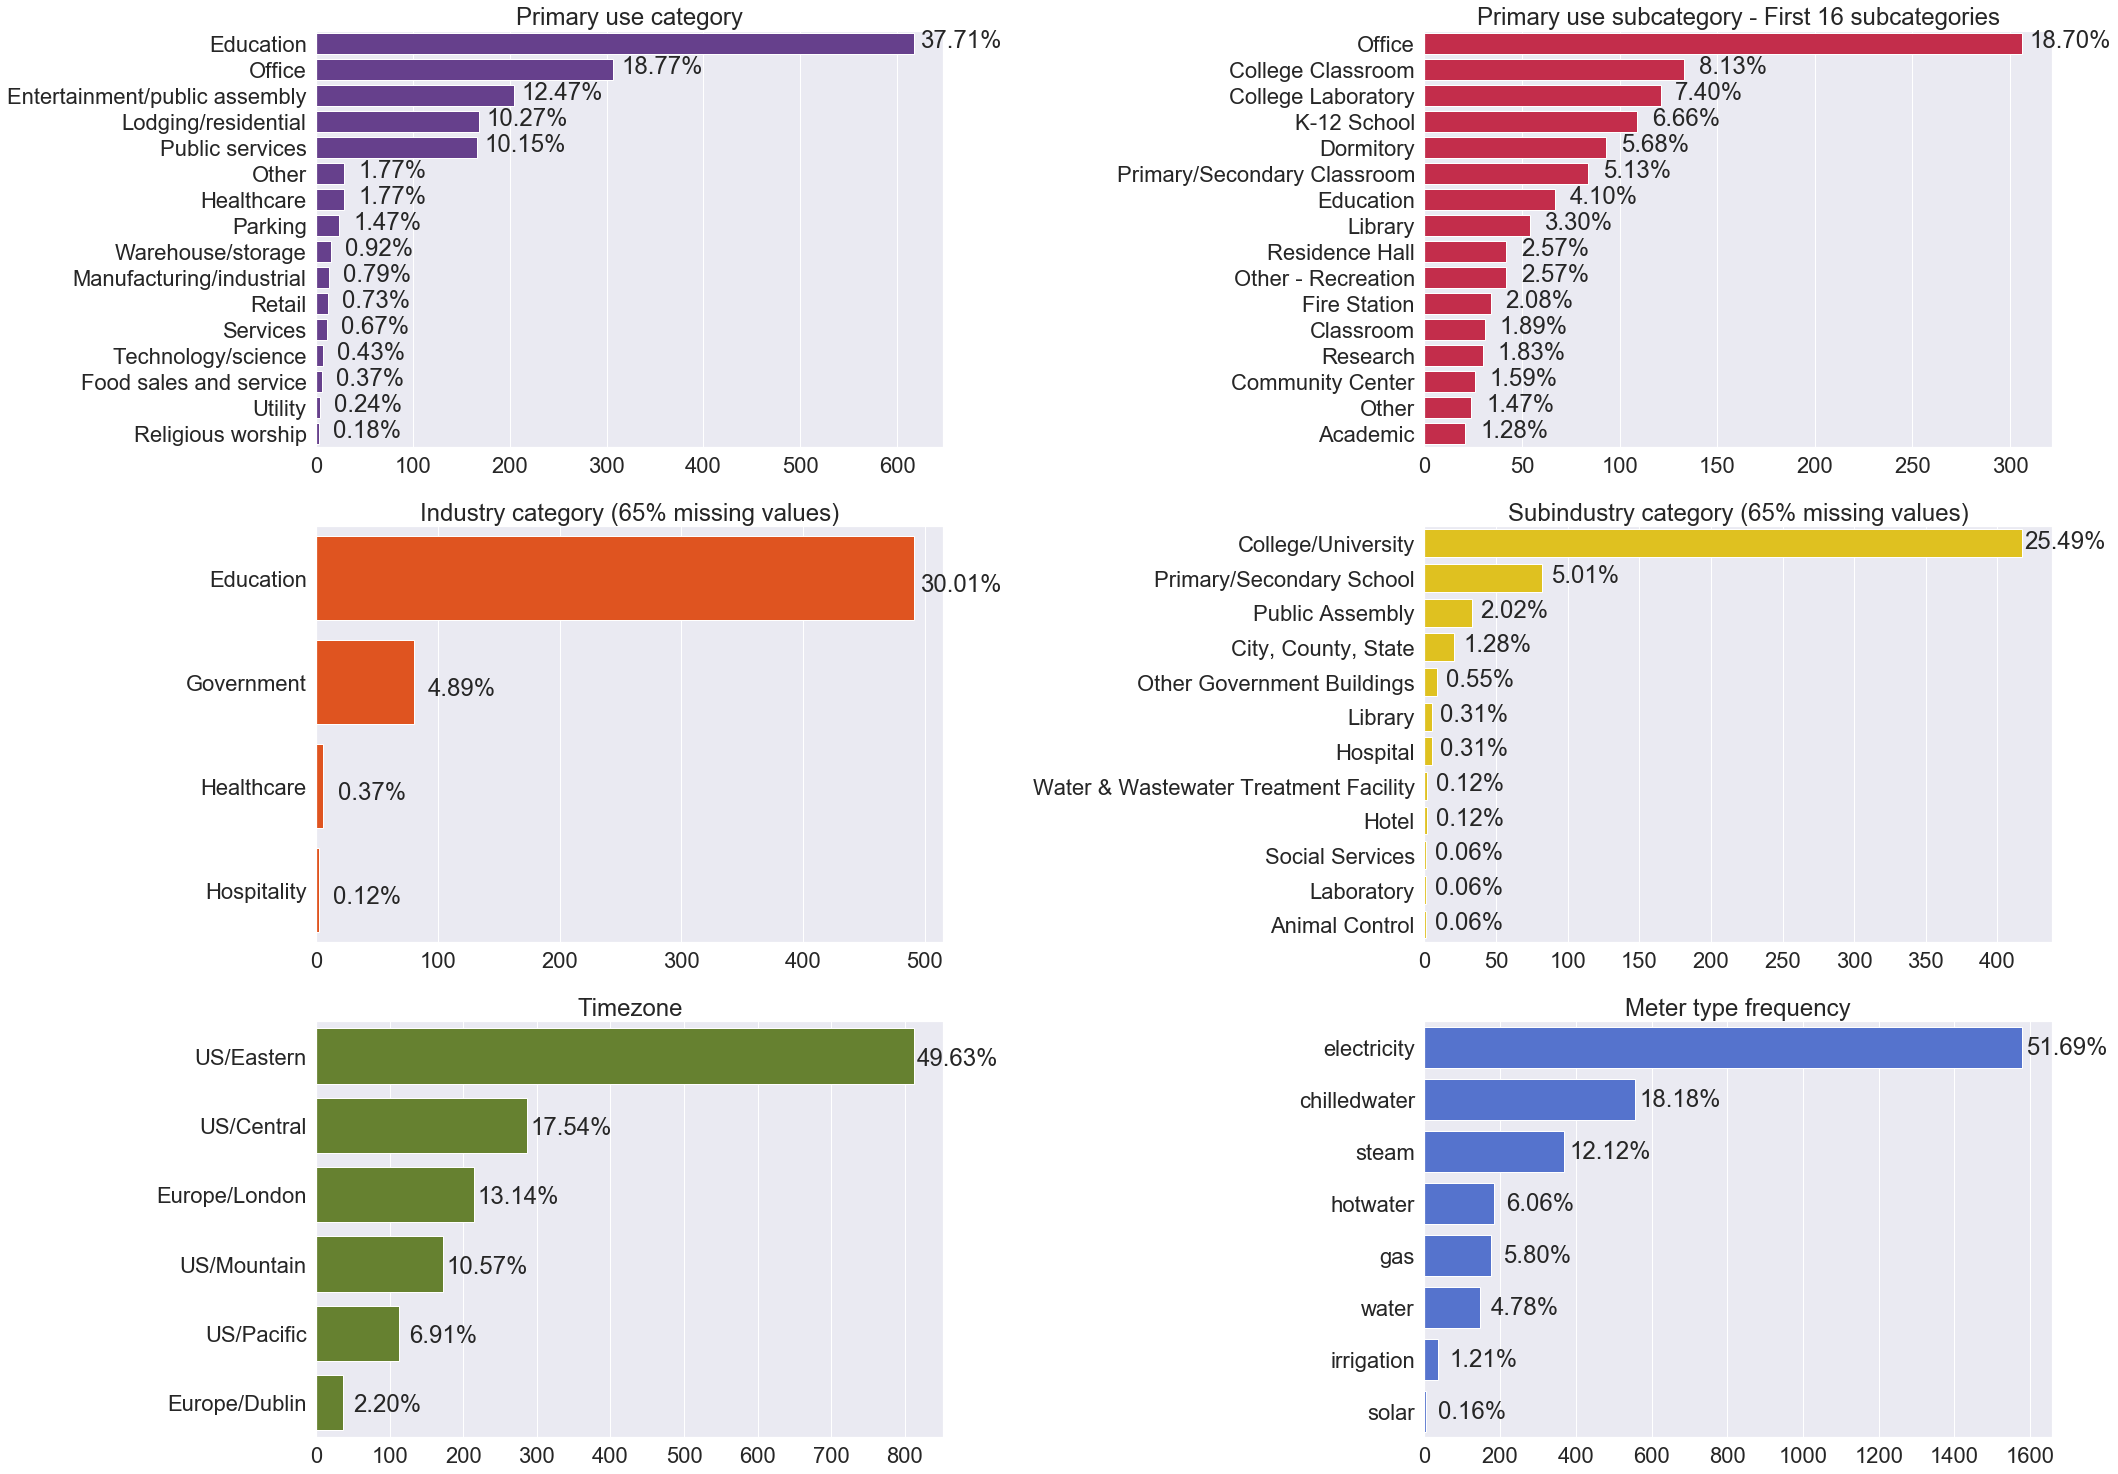

In [15]:
sns.set(rc={'figure.figsize':(30,21)})
sns.set(font_scale = 2)
f, axes = plt.subplots(3, 2)
axes = axes.flatten()

# primary use category countplot in decreasing order
ax1 = axes[0]
g1 = sns.countplot(data=metadata, y="primaryspaceusage", color= colors[0], orient="h", ax=ax1, order = metadata['primaryspaceusage'].value_counts().index)
ax1.title.set_text('Primary use category')
ax1.set(ylabel="", xlabel="")
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g1.patches:
    width = p.get_width()
    g1.text(width + 50,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
    
# primary use subcategory countplot in decreasing order
ax2 = axes[1]
g2 = sns.countplot(data=metadata, y="sub_primaryspaceusage", color= colors[1], orient="h", ax=ax2, order = metadata['sub_primaryspaceusage'].value_counts().iloc[:16].index)
ax2.title.set_text('Primary use subcategory - First 16 subcategories')
ax2.set(ylabel="", xlabel="")
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g2.patches:
    width = p.get_width()
    g2.text(width + 25,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 

# industry countplot in decreasing order
ax3 = axes[2]
g3 = sns.countplot(data=metadata, y="industry", color=colors[2], ax=ax3, orient="h", order = metadata['industry'].value_counts().index)
ax3.title.set_text('Industry category (65% missing values)')
ax3.set(ylabel="", xlabel="")
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g3.patches:
    width = p.get_width()
    g3.text(width + 40,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
    
# subindustry countplot in decreasing order
ax4 = axes[3]
g4 = sns.countplot(data=metadata, y="subindustry", color=colors[3], ax=ax4, orient="h", order = metadata['subindustry'].value_counts().index)
ax4.title.set_text('Subindustry category (65% missing values)')
ax4.set(ylabel="", xlabel="")
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g4.patches:
    width = p.get_width()
    g4.text(width + 30,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
    
# timezone countplot in decreasing order
ax5 = axes[4]
g5 = sns.countplot(data=metadata, y="timezone", color=colors[4], ax=ax5, orient="h", order = metadata['timezone'].value_counts().index)
ax5.title.set_text('Timezone')
ax5.set(ylabel="", xlabel="")
# adds percentage    
total = float(len(metadata)) # number of buildings
for p in g5.patches:
    width = p.get_width()
    g5.text(width + 60,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center") 
    
# Meters type frequency
ax6 = axes[5]
# Temporal datafram
temp = pd.melt(metadata[["building_id","electricity","hotwater","chilledwater","steam","water","irrigation","gas","solar"]],id_vars = "building_id", var_name="meter")
# plot
g6 = sns.countplot(data=temp.loc[temp['value']=="Yes"], y='meter', color= colors[5], ax=ax6, orient="h", order = temp.loc[temp['value']=="Yes"]["meter"].value_counts().index)
g6.title.set_text('Meter type frequency')
g6.set(ylabel="", xlabel="")
# adds percentage    
total = temp.loc[temp['value']=="Yes"]["value"].value_counts()[0] # number of meters
for p in g6.patches:
    width = p.get_width()
    g6.text(width + 120,
            p.get_y() + p.get_height()/1.5,
            '{:1.2%}'.format(width/total),
            ha="center")    
    
plt.tight_layout()

In [16]:
f.savefig("..\\figures\\metadata_cat.pdf", bbox_inches='tight')
f.savefig("..\\figures\\metadata_cat.png", bbox_inches='tight')

### Number of buildings in each site

In [5]:
metadata.groupby("site_id").building_id.count()

site_id
Bear         92
Bobcat       36
Bull        124
Cockatoo    124
Crow          5
Eagle        47
Fox         137
Gator        74
Hog         163
Lamb        147
Moose        15
Mouse         7
Panther     136
Peacock     106
Rat         305
Robin        52
Shrew         9
Swan         21
Wolve        36
Name: building_id, dtype: int64

## Continuous features

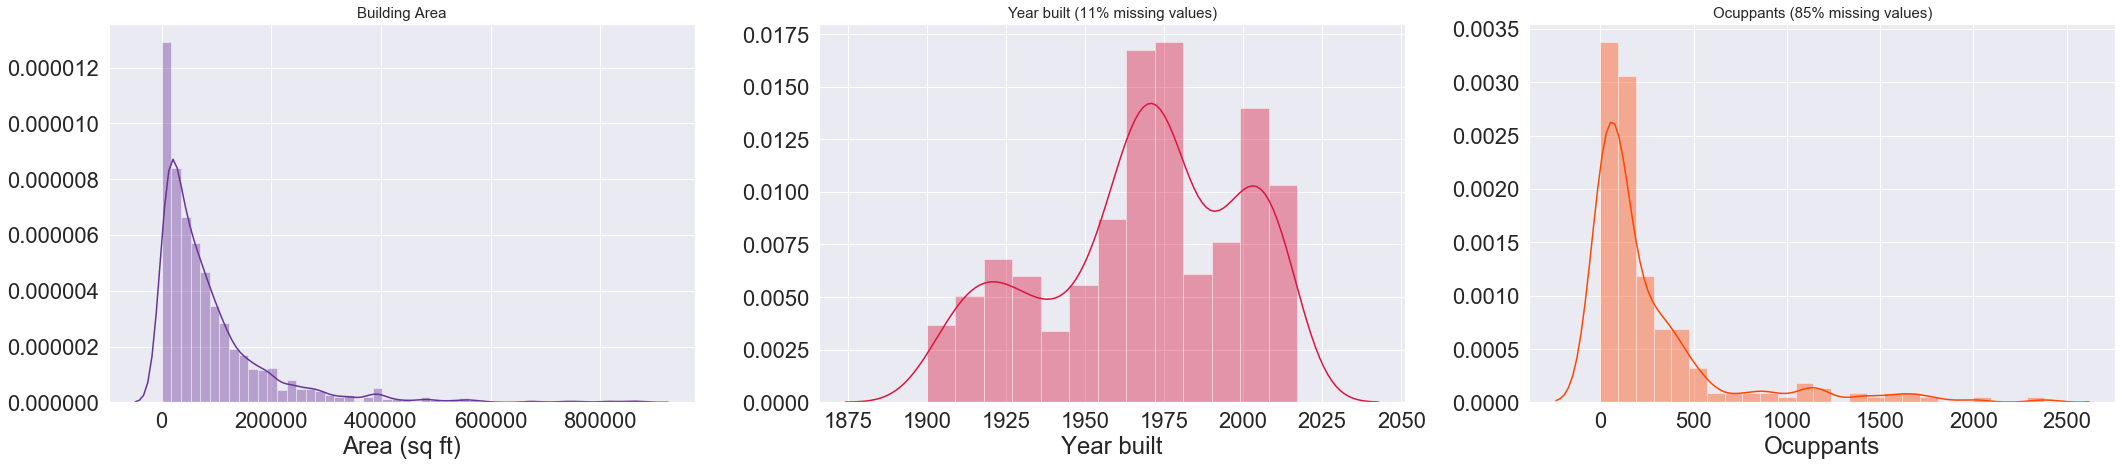

In [17]:
sns.set(rc={'figure.figsize':(30,7)})
sns.set(font_scale = 2)
f, axes = plt.subplots(1, 3)
axes = axes.flatten()

# "sqft" histogram
ax1 = axes[0]
g1 = sns.distplot(metadata["sqft"], ax=ax1, color=colors[0])
ax1.set_title('Building Area')
ax1.set(xlabel="Area (sq ft)")

# "yearbuilt" histogram
ax2 = axes[1]
g2 = sns.distplot(metadata["yearbuilt"].dropna(), ax=ax2, color=colors[1])
ax2.set_title('Year built (11% missing values)')
ax2.set(xlabel="Year built")

# "occupants" histogram
ax3 = axes[2]
g3 = sns.distplot(metadata["occupants"].dropna(), ax=ax3, color=colors[2])
ax3.set_title('Ocuppants (85% missing values)')
ax3.set(xlabel="Ocuppants")

# Sets fontsize
for ax in axes:
    ax.title.set_size(15)
    
f.tight_layout()

In [18]:
f.savefig("..\\figures\\metadata_cont.pdf", bbox_inches='tight')
f.savefig("..\\figures\\metadata_cont.png", bbox_inches='tight')